In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn import datasets

In [2]:
df = datasets.load_boston()

In [4]:
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

###**Train test split**

In [6]:
X = df.data; y = df.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
print("Training feature set size:", X_train.shape)
print("Test feature set size:", X_test.shape)
print("Training variable set size:", y_train.shape)
print("Test variable set sieze:", y_test.shape)

Training feature set size: (354, 13)
Test feature set size: (152, 13)
Training variable set size: (354,)
Test variable set sieze: (152,)


###**Model fit & traing**

In [9]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

###**Prediction**

In [10]:
expected_y  = y_test
predicted_y = model.predict(X_test)

In [11]:
df_check = pd.DataFrame({"y_actual": y_test, "y_predicted": predicted_y})
df_check.head()

,y_actual,y_predicted
0,19.4,19.254717
1,15.6,16.500000
2,21.9,24.596078
3,13.5,16.500000
4,20.1,20.734659


###**Evaluation**

In [12]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))

0.7985889244183726
0.034754171054386974


**Plot regression**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


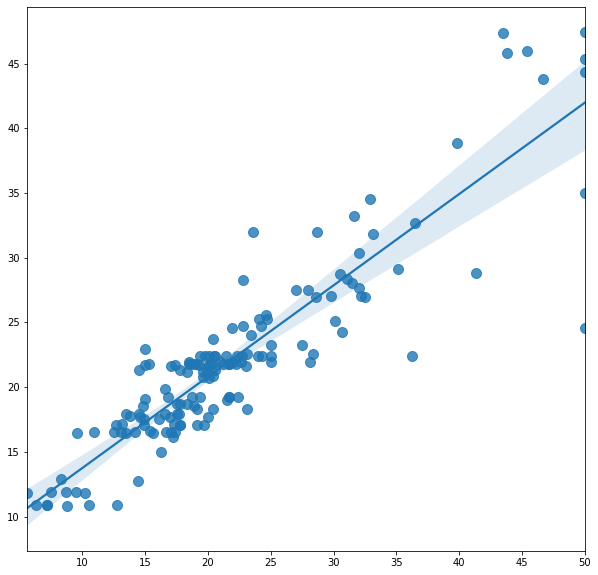

In [15]:
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})